In [1]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
import matplotlib.pyplot as plt

In [2]:
train_dir = "D:/python/Emotion Detection/Data/train" 
test_dir = "D:/python/Emotion Detection/Data/test"   
img_size = 48 

In [3]:

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [4]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 32383 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [15]:
model= tensorflow.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))



In [16]:
model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [17]:
epochs = 60
batch_size = 64
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [18]:

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')


mc = ModelCheckpoint(filepath="best_model_sequential_new.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')


call_back = [mc]

In [ ]:
history = model.fit(
    x = train_generator,epochs = epochs,steps_per_epoch=500,validation_data = validation_generator,callbacks=[mc]
)


Epoch 1/60
500/500 [==============================] - 1101s 2s/step - loss: 7.4473 - accuracy: 0.3181 - val_loss: 6.7752 - val_accuracy: 0.3135

Epoch 00001: val_accuracy improved from 0.25559 to 0.31355, saving model to best_model_sequential.h5
Epoch 2/60
500/500 [==============================] - 1098s 2s/step - loss: 6.0631 - accuracy: 0.3868 - val_loss: 5.5305 - val_accuracy: 0.3743

Epoch 00002: val_accuracy improved from 0.31355 to 0.37430, saving model to best_model_sequential.h5
Epoch 3/60
500/500 [==============================] - 1178s 2s/step - loss: 4.9149 - accuracy: 0.4373 - val_loss: 4.5301 - val_accuracy: 0.3939

Epoch 00003: val_accuracy improved from 0.37430 to 0.39385, saving model to best_model_sequential.h5
Epoch 4/60
500/500 [==============================] - 1255s 3s/step - loss: 4.0134 - accuracy: 0.4649 - val_loss: 3.7725 - val_accuracy: 0.4274

Epoch 00004: val_accuracy improved from 0.39385 to 0.42737, saving model to best_model_sequential.h5
Epoch 5/60
500/5

500/500 [==============================] - 747s 1s/step - loss: 1.2161 - accuracy: 0.6882 - val_loss: 1.2960 - val_accuracy: 0.6487

Epoch 00037: val_accuracy did not improve from 0.66131
Epoch 38/60
500/500 [==============================] - 747s 1s/step - loss: 1.2067 - accuracy: 0.6880 - val_loss: 1.3489 - val_accuracy: 0.6320

Epoch 00038: val_accuracy did not improve from 0.66131
Epoch 39/60
500/500 [==============================] - 751s 2s/step - loss: 1.2081 - accuracy: 0.6894 - val_loss: 1.3321 - val_accuracy: 0.6411

Epoch 00039: val_accuracy did not improve from 0.66131
Epoch 40/60
500/500 [==============================] - 752s 2s/step - loss: 1.2009 - accuracy: 0.6927 - val_loss: 1.3079 - val_accuracy: 0.6557

Epoch 00040: val_accuracy did not improve from 0.66131
Epoch 41/60
500/500 [==============================] - 756s 2s/step - loss: 1.1970 - accuracy: 0.6941 - val_loss: 1.3075 - val_accuracy: 0.6453

Epoch 00041: val_accuracy did not improve from 0.66131
Epoch 42/60


In [28]:
# model.save_weights('best_model_sequential_weights.h5')
# model.save('best_model_sequential_save.h5')

In [5]:
em_model = load_model('best_model_sequential.h5')

In [6]:
op = dict(zip( train_generator.class_indices.values(), train_generator.class_indices.keys()))

 The emotion of the person in the image is sad


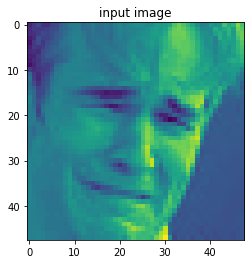

In [8]:
path = "D:/python/Emotion Detection/0003.jpg"
img = load_img(path, target_size=(48,48),color_mode = "grayscale" )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(em_model.predict(input_arr))

print(f" The emotion of the person in the image is {op[pred]}")
 
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()